In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma,sph_harm


# Trying to create true A slice from simulation results

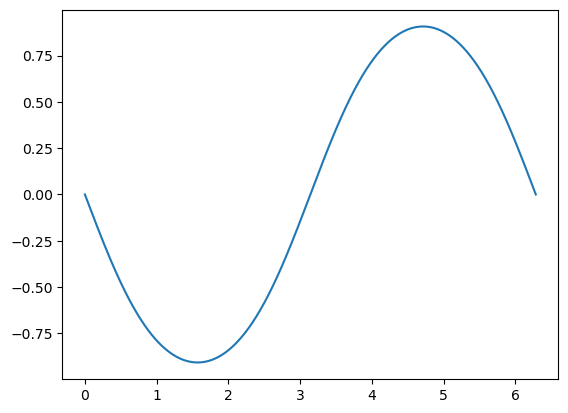

In [5]:
lm_array = np.array([25,24,23,22,21,26])

amplitudes = np.array([1.0,0.8141614906832297,0.21953416149068322,0.06271739130434782,0.017220496894409937,0.005667701863354037])


theta = np.array([np.pi/2])
phi = np.linspace(0,2*np.pi,1000)

E = 0.48
k = np.sqrt(2*E)


def computePAD(lm,amplitudes,phi,theta,opp = False):
    total = 0
    for i,lm in enumerate(lm_array):
        if not opp:
            total += amplitudes[i] * (-1j)**lm * np.angle(gamma(lm + 1 -1j/k)) * sph_harm(lm,lm,phi,theta)
        else:
            total += amplitudes[i] * (-1j)**lm * np.angle(gamma(lm + 1 -1j/k)) * sph_harm(lm,lm,phi,theta) * (-1)**lm
    return np.abs(total)**2

PAD = computePAD(lm_array,amplitudes,phi,theta)
PAD_opp = computePAD(lm_array,amplitudes,phi,theta,opp = True)

A = (PAD-PAD_opp)/(PAD+PAD_opp)

plt.plot(phi,A)




# Trying to reconstruct wavefunction